<a href="https://colab.research.google.com/github/2303A52058/Generative-AI/blob/main/Gen_AI_A8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

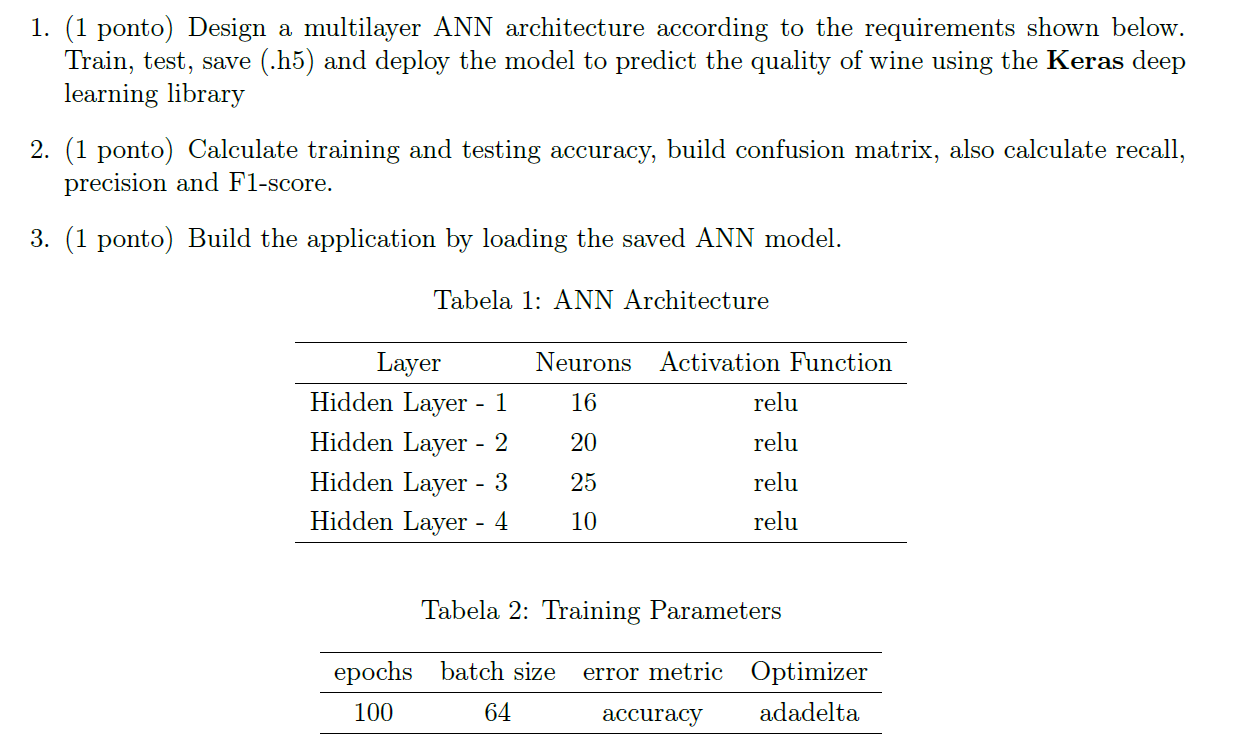

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv("winequality-red.csv")

# Assuming the dataset has 'quality' as target column
y = df['quality']
X = df.drop(columns=['quality'])

# Convert target variable to categorical
y = LabelEncoder().fit_transform(y)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define ANN model
model = Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(20, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Multi-class classification
])

# Compile model
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Save model
model.save("wine_quality_model.keras")

# Load saved model for deployment
loaded_model = load_model("wine_quality_model.keras")

# Evaluate model
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predictions and performance metrics
y_pred = np.argmax(loaded_model.predict(X_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0147 - loss: 1.9164 - val_accuracy: 0.0156 - val_loss: 1.9216
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0200 - loss: 1.9139 - val_accuracy: 0.0156 - val_loss: 1.9213
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0276 - loss: 1.9151 - val_accuracy: 0.0156 - val_loss: 1.9209
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0232 - loss: 1.9072 - val_accuracy: 0.0156 - val_loss: 1.9205
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0287 - loss: 1.9167 - val_accuracy: 0.0156 - val_loss: 1.9201
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0208 - loss: 1.9151 - val_accuracy: 0.0156 - val_loss: 1.9197
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0237 - loss: 1.9042 - val_accuracy: 0.0156 - val_loss: 1.9193
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0267 - loss: 1.9070 - val_accuracy: 0.0156 - 